# Домашнее задание "Теория вероятности. Непрерывные Случайные Величины".

## Уровень 0:

- Задание 1:


Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

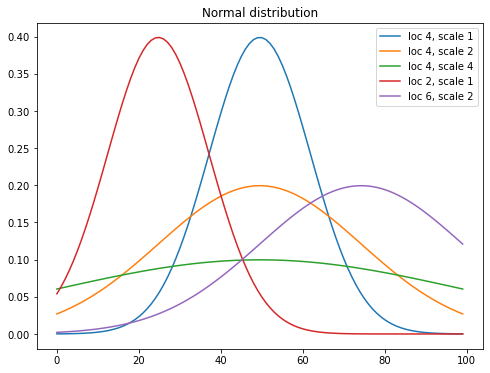

In [192]:
x = np.linspace(0, 8, 100)
norm_4_1 = sts.norm.pdf(x, loc=4, scale=1)
norm_4_2 = sts.norm.pdf(x, loc=4, scale=2)
norm_2_1 = sts.norm.pdf(x, loc=2, scale=1)
norm_6_2 = sts.norm.pdf(x, loc=6, scale=2)
norm_4_4 = sts.norm.pdf(x, loc=4, scale=4)

plt.figure(figsize = (8, 6))
plt.subplot()
plt.plot(norm_4_1, label = 'loc 4, scale 1')
plt.plot(norm_4_2, label = 'loc 4, scale 2')
plt.plot(norm_4_4, label = 'loc 4, scale 4')
plt.plot(norm_2_1, label = 'loc 2, scale 1')
plt.plot(norm_6_2, label = 'loc 6, scale 2')

plt.title('Normal distribution')
plt.legend()
plt.show()

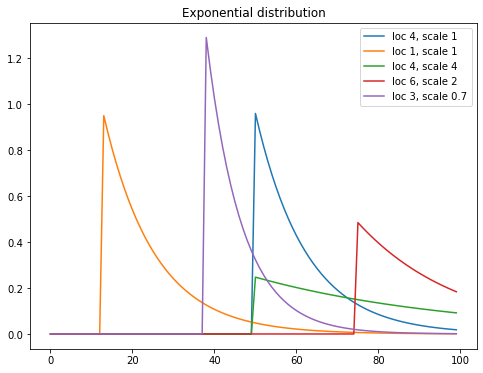

In [69]:
x = np.linspace(0, 8, 100)
exp_4_1 = sts.expon.pdf(x, loc=4, scale=1)
exp_1_1 = sts.expon.pdf(x, loc=1, scale=1)
exp_4_4 = sts.expon.pdf(x, loc=4, scale=4)
exp_6_2 = sts.expon.pdf(x, loc=6, scale=2)
exp_3 = sts.expon.pdf(x, loc=3, scale=.7)

plt.figure(figsize = (8, 6))
plt.subplot()
plt.plot(exp_4_1, label = 'loc 4, scale 1')
plt.plot(exp_1_1, label = 'loc 1, scale 1')
plt.plot(exp_4_4, label = 'loc 4, scale 4')
plt.plot(exp_6_2, label = 'loc 6, scale 2')
plt.plot(exp_3, label = 'loc 3, scale 0.7')

plt.title('Exponential distribution')
plt.legend()
plt.show()

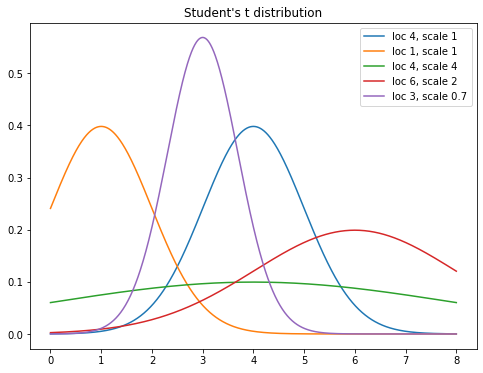

In [114]:
x = np.linspace(0, 8, 1000)
t_4_1 = sts.t(100, loc=4, scale=1)
t_1_1 = sts.t(100, loc=1, scale=1)
t_4_4 = sts.t(100, loc=4, scale=4)
t_6_2 = sts.t(100, loc=6, scale=2)
t_3 = sts.t(100, loc=3, scale=.7)

plt.figure(figsize = (8, 6))
plt.subplot()
plt.plot(x, t_4_1.pdf(x), label = 'loc 4, scale 1')
plt.plot(x, t_1_1.pdf(x), label = 'loc 1, scale 1')
plt.plot(x, t_4_4.pdf(x), label = 'loc 4, scale 4')
plt.plot(x, t_6_2.pdf(x), label = 'loc 6, scale 2')
plt.plot(x, t_3.pdf(x), label = 'loc 3, scale 0.7')

plt.title("Student's t distribution")
plt.legend()
plt.show()

Интуиция получена: при увеличении матожидания вершина графика функции плотности распределения сдвигается вправо. При увеличении среднеквадратичного отклонения график становится более плоским

## Уровень 1:

- Задание 2

Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$Найдите C, математическое ожидание $\xi$ а также вероятность попадания  в отрезок $[3.5;7]$, т.е. P(3.5 &lt; $\xi$ &lt; 7).

In [116]:
import scipy.integrate as integrate

In [180]:
# Функция плотности задана константой, следовательно, у нас равномерное распределение. C можно найти по формуле.
a = 0
b = 5
C = 1 / (b - a)

print(f'C = {C}')

C = 0.2


In [181]:
# Математическое ожидание можно найти как a + b пополам, но так неинтересно. Поэтому нахожу его через определенный интеграл.
M = integrate.quad(lambda x: C * x, a, b)[0]

print(f'Математическое ожидание = {M}')

Математическое ожидание = 2.5


In [183]:
# Вероятность тоже нахожу через интеграл. Верхняя граница = b,
# потому что выше этого значения плотность распределения = 0 по условию.
P = integrate.quad(lambda x: C, 3.5, b)[0]

print(f'Вероятность попадания в отрезок [3.5; 7] = {P:.2f}')

Вероятность попадания в отрезок [3.5; 7] = 0.30


- Задание 3


Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

In [135]:
import math

In [ ]:
# Сначала расчитаю вероятность появления каждого цвета в данную секунду.
unsteady_light = {'red': 54, 'yellow': 4, 'green': 28}
steady_light = {'red': 28, 'yellow': 28, 'green': 28}

def p_colors(red, yellow, green):
    all_time = red + yellow + green
    def p_color(color):
        return color / all_time
    return(p_color(red), p_color(yellow), p_color(green))

In [190]:
#Далее полученные вероятности передам в формулу Шеннона. 
def Shennon(*args):
    def small_Shennon(p):
        return - (p * math.log2(p))
    
    shennon = 0
    for arg in args:
        shennon += small_Shennon(arg)
    
    return shennon

print (f'Количество информации в каждую секунду работы неравномерного светофора = {Shennon(*p_colors(**unsteady_light))} бит')
print (f'Количество информации в каждую секунду работы равномерного светофора по формуле Шеннона = {Shennon(*p_colors(**steady_light))} бит')

Количество информации в каждую секунду работы неравномерного светофора = 1.154522162441165 бит
Количество информации в каждую секунду работы равномерного светофора по формуле Шеннона = 1.584962500721156 бит


In [191]:
# Во втором случае вероятности появления каждого цвета равны, поэтому можно использовать формулу Хартли:
def Hartley(N):
    return math.log2(N)

print (f'Количество информации в каждую секунду работы равномерного светофора по формуле Хартли = {Hartley(len(steady_light))} бит')

Количество информации в каждую секунду работы равномерного светофора по формуле Хартли = 1.584962500721156 бит


In [189]:
# Для второго светофора результаты, полученные с помощью формулы Шеннона и формулы Хартли, совпадают.
Shennon(*p_colors(**steady_light)) == Hartley(len(steady_light))

True